In [939]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.io import wavfile
import scipy.signal as signal

In [940]:
def image_to_bits(filename = ""):
    return [0, 1, 0, 1, 1, 0, 1, 0, 1]

In [941]:
def bits_to_image(bits):
    return 0

In [942]:
def audio_from_wav(filename):
    fs, data = wavfile.read(filename)
    print(type(data[0,0]))
    audio = (data[:,0] + data[:,1]) // 2
    data[:,0] = audio
    data[:,1] = audio
    # wavfile.write(filename, fs, data)
    return fs, audio;

In [943]:
def audio_to_wav(audio, filename, fs):
    data = np.zeros((len(audio), 2)).astype(np.int16)
    data[:,0] = audio
    data[:,1] = audio
    print(type(data[0,0]))
    wavfile.write(filename, fs, data)

In [944]:
def pad_audio(audio, fs, df):
    N = len(audio)
    N_min = fs/df
    N_req = int((N // N_min + 1) * N_min - N)
    pad = np.linspace(0, 0, N_req)
    audio = np.concatenate((audio, pad))
    return audio

In [945]:
import numpy as np
def remove_low_frequencies(audio, fs, f_max):

    audio_fft = scipy.fftpack.rfft(audio)

    f_full = scipy.fftpack.fftfreq(len(audio), 1/fs)

    plt.figure()
    plt.plot(f_full, np.abs(audio_fft))
    plt.xlim([0, f_max*2])
    plt.ylim([0, 1.5e7])
    plt.title('Song fft')

    audio_fft[0:len(audio)*f_max//fs] = 0

    plt.figure()
    plt.plot(f_full, np.abs(audio_fft))
    plt.xlim([0, f_max*2])
    plt.ylim([0, 1.5e7])
    plt.title('Song fft')
    
    audio = np.real(scipy.fftpack.irfft(audio_fft))

    return audio

In [946]:
def add_data(audio, data, df, f_min):
    return audio

<class 'numpy.int16'>
<class 'numpy.int16'>


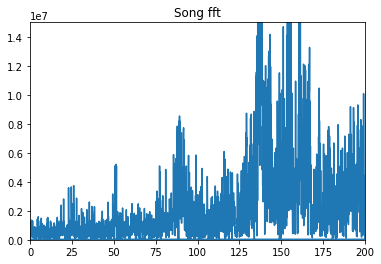

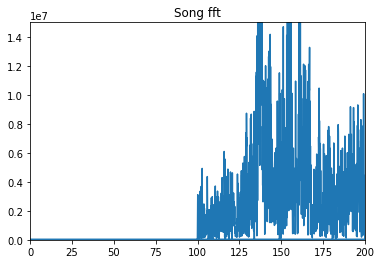

In [947]:
DELTA_FREQUENCIES = 0.1 # Hz
LOWEST_FREQUENCY = 1 # Hz

fs, audio = audio_from_wav('bumblebee_small.wav')
pad_audio(audio, fs, DELTA_FREQUENCIES)
remove_low_frequencies(audio, fs, 100)
audio_to_wav(audio, 'bumblebee_small_no_low.wav', fs)
